# 1st Assignment: Exploring AirBnB in Europe
> Markella Englezou, 8210039 <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> t8210039@aueb.gr

*A lot has been said and written about the effect of AirBnB around the world. In this assignment, you will use the data collected by [Inside AirBnB](http://insideairbnb.com).*

*Once you do that, spend some time familiarizing yourself with the data and then go ahead and do the following tasks. In the following questions, you will use data for the following cities: Amsterdam, Athens, Barcelona, Berlin, Copenhagen, Dublin, Lisbon, London, Madrid, Paris, Rome, Venice, Vienna*

*You will use the data for the latest 12 months period for which data is available.*

* Importing all necessary libraries.

In [29]:
import os
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display, clear_output

* Downloading all necessary data.

In [30]:
# Define the base URL and city list with paths
base_url = "https://data.insideairbnb.com"
cities = {
    "Amsterdam": "/the-netherlands/north-holland/amsterdam/2024-09-05/visualisations/listings.csv",
    "Athens": "/greece/attica/athens/2024-06-26/visualisations/listings.csv",
    "Barcelona": "/spain/catalonia/barcelona/2024-09-06/visualisations/listings.csv",
    "Berlin": "/germany/be/berlin/2024-06-22/visualisations/listings.csv",
    "Copenhagen": "/denmark/hovedstaden/copenhagen/2024-06-29/visualisations/listings.csv",
    "Dublin": "/ireland/leinster/dublin/2024-09-11/visualisations/listings.csv",
    "Lisbon": "/portugal/lisbon/lisbon/2024-09-14/visualisations/listings.csv",
    "London": "/united-kingdom/england/london/2024-09-06/visualisations/listings.csv",
    "Madrid": "/spain/comunidad-de-madrid/madrid/2024-09-11/visualisations/listings.csv",
    "Paris": "/france/ile-de-france/paris/2024-09-06/visualisations/listings.csv",
    "Rome": "/italy/lazio/rome/2024-09-11/visualisations/listings.csv",
    "Venice": "/italy/veneto/venice/2024-09-05/visualisations/listings.csv",
    "Vienna": "/austria/vienna/vienna/2024-09-11/visualisations/listings.csv"
}

# Create the base directory if it doesn't exist
base_dir = "data"
os.makedirs(base_dir, exist_ok=True)

# Loop through each city and download the listings.csv
for city, path in cities.items():
    # Create city folder if it doesn't exist
    city_folder = os.path.join(base_dir, city)
    os.makedirs(city_folder, exist_ok=True)

    # Construct the download URL and file path
    url = f"{base_url}{path}"
    file_path = os.path.join(city_folder, "listings.csv")
    
    # Download the file
    response = requests.get(url)
    if response.status_code == 200:
        with open(file_path, 'wb') as file:
            file.write(response.content)
        print(f"Downloaded listings.csv for {city}")
    else:
        print(f"Failed to download listings.csv for {city}. Status code: {response.status_code}")

Downloaded listings.csv for Amsterdam
Downloaded listings.csv for Athens
Downloaded listings.csv for Barcelona
Downloaded listings.csv for Berlin
Downloaded listings.csv for Copenhagen
Downloaded listings.csv for Dublin
Downloaded listings.csv for Lisbon
Downloaded listings.csv for London
Downloaded listings.csv for Madrid
Downloaded listings.csv for Paris
Downloaded listings.csv for Rome
Downloaded listings.csv for Venice
Downloaded listings.csv for Vienna


* Creating a list of all the cities.

In [31]:
cities = ["Amsterdam", "Athens", "Barcelona", "Berlin", "Copenhagen", "Dublin", "Lisbon", "London", "Madrid", "Paris", "Rome", "Venice", "Vienna"]

* Setting the path to the 'data' directory.

In [32]:
data_dir = "data"

# AirBnB Listings

*Find the number of AirBnB listings per city. Show the information in tabular format, and also make a plot.*

* Creating an empty list in which I will add the listings.

In [33]:
listings = []

* Looping through each folder in the 'data' directory.
* Checking if the path is a directory and the 'listings.csv' file exists in it.
* Reading the csv file and appending its length to the list.

In [34]:
for city in os.listdir(data_dir): 
    city_path = os.path.join(data_dir, city)
    if os.path.isdir(city_path):
        csv_path = os.path.join(city_path, 'listings.csv')
        if os.path.isfile(csv_path):
            listing = pd.read_csv(csv_path)
            num_listings = len(listing)
            listings.append(num_listings)

* Creating a DataFrame for the data.

In [35]:
df = pd.DataFrame({
    "City": cities,
    "Listings": listings
})

* Showing all findings in tabular format.

In [36]:
df

,City,Listings
0,Amsterdam,9659
1,Athens,13274
2,Barcelona,19482
3,Berlin,13759
4,Copenhagen,20909
5,Dublin,6175
6,Lisbon,24204
7,London,96182
8,Madrid,26980
9,Paris,95461


* Showing all findings in a plot.

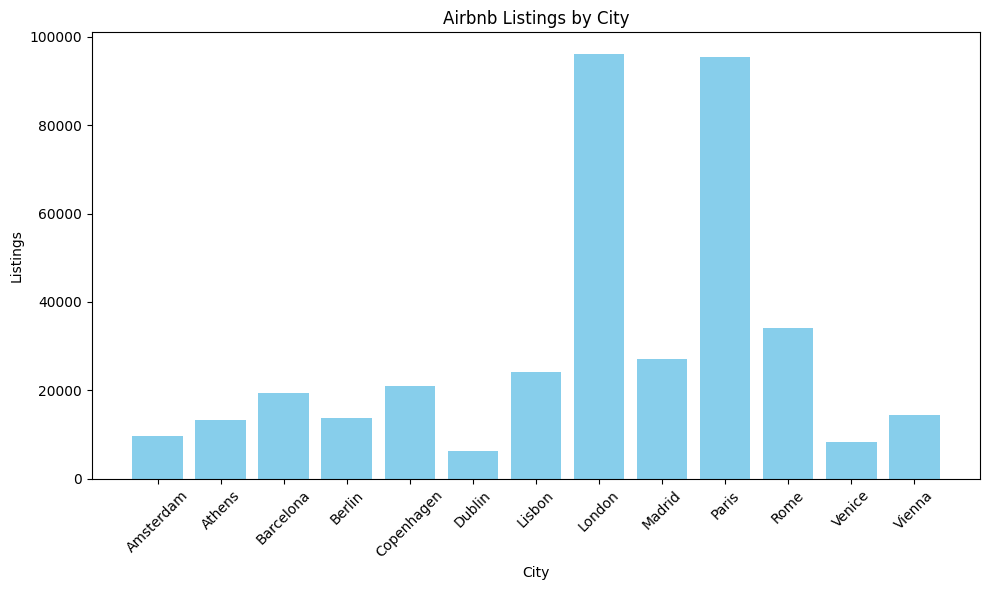

In [37]:
plt.figure(figsize=(10, 6))
plt.bar(df['City'], df['Listings'], color='skyblue')
plt.title('Airbnb Listings by City')
plt.xlabel('City')
plt.ylabel('Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# AirBnB Densities

*Apart from the number of distinct listings, we are interested in the density, that is, the number of AirBnB listings per 1,000 inhabitants, again for the latest 12 months period for which data is available. You must determine the number of inhabitants per city in the most appropriate way. Show the information in tabular format, and also make a plot.*

### Amsterdam

* On the insideAirBnB map, the data for Amsterdam excludes Westport region.
* The [Amsterdam's Municipal Research and Statistics (O&S)](https://onderzoek.amsterdam.nl/interactief/dashboard-kerncijfers?tab=indicator&thema=bevolking&indicator=BEVTOTAAL&indeling=ggwgebieden&jaar=2024&gebied=GA01&taal=nl) website provides data as of 2024 that do not include the Westport region.
* We can see that the population of Amsterdam is 931.748.

### Athens

* On the insideAirBnB map, the data for Athens only includes the Municipality of Athens.
* The [Hellenic Statistical Authority (ELSTAT)](https://www.statistics.gr/el/statistics/-/publication/SAM03/-) website provides the most recent data as of 2021.
* The population of the Municipality of Athens is 643.449.

### Barcelona

* The [Instituto Nacional de Estadística (INE)](https://www.ine.es/jaxiT3/Tabla.htm?t=59589&L=1) website provides data as of July 2024.
* The population of Barcelona is 5.924.293.

### Berlin

* The [Statistisches Landesamt Berlin (Berlin-Brandenburg State Statistical Office)](https://www.statistik-berlin-brandenburg.de/kommunalstatistik/einwohnerbestand-berlin) website provides data as of 31st December 2023.
* The population of Berlin is 3.878.100.

### Copenhagen

* On the insideAirBnB map, the data for Copenhagen includes Fredericksberg.
* The [Statistics Denmark’s](https://www.statbank.dk/statbank5a/SelectVarVal/Define.asp?MainTable=FOLK1AM&PLanguage=1&PXSId=0&wsid=cftree) website provides data as of September 2024, the same month the data from insideAirBnB are collected.
* We can see that the population for Copenhagen is 664.376 and for Frederiksberg is 105.518.
* Consequently, the population of the highlighted area is 769.894.

### Dublin

* On the insideAirBnB map, the data for Dublin includes the entire Dublin Regional Authority area (Dublin City, Dún Laoghaire–Rathdown, Fingal and South Dublin).
* The [Central Statistics Office (CSO) Ireland](https://visual.cso.ie/?body=entity/ima/cop/2022&boundary=C03880V04631&guid=F97E459B-57ED-49C0-8A28-2BC1C7F08E88) website provides data as of 2022.
* The population of Dublin Regional Authority is 1.458.154.

### Lisbon

* On the insideAirBnB map, the data for Lisbon includes the entire Greater Lisbon area (Mafra, Vila Franca de Xira, Sintra, Loures, Odivelas, Amadora, Lisbon, Oeiras and Cascais), part of the Intermunicipal Community of the West (Oeste CIM) area (Lourinha, Cadaval, Torres Vedras, Alenquer, Sobral de Monte Agraco and Arruda dos Vinhos) and Azambuja.
* The [PORDATA](https://www.pordata.pt/pt/estatisticas/populacao/populacao-residente/populacao-residente-por-sexo-e-grupo-etario) website provides data as of 2023.
* The population of the aforementioned countries is: Mafra-90.128, Vila Franca de Xira-139.452, Sintra-395.528, Loures-207.065, Odivelas-153.708, Amadora-178.253, Lisbon-567.131, Oeiras-175.677, Cascais-219.636, Lourinha-28.383, Cadaval-14.435, Torres Vedras-88.020, Alenquer-48.319, Sobral de Monte Agraco-11.879, Arruda dos Vinhos-15.321, 
Azambuja-22.932.
* Hence, the total population of the region is 2.355.867.

### London

* The [Office for National Statistics (ONS)](https://www.nomisweb.co.uk/sources/census_2021/report?compare=E12000007) website provides the most recent data as of 2021.
* The population of London is 8.799.728.

### Madrid

* On the insideAirBnB map, the data includes the entire Madrid City Administrative area.
* The [Instituto Nacional de Estadística (INE)](https://www.ine.es/nomen2/index.do?accion=busquedaAvanzada&entidad_amb=no&codProv=28&codMuni=79&codEC=0&codES=0&codNUC=0&denominacion_op=like&denominacion_txt=&L=1) website provides data as of 2023.
* The population of Madrid City Administrative area is 3.332.035.

### Paris

* The [World Population Review](https://worldpopulationreview.com/cities/france) website provides data as of 2024.
* The population of Paris is 2.138.551.

### Rome

* On the insideAirBnB map, the data includes the entire Municipio I area, also known as Roma City area.
* The [CityPopulation.de](https://www.citypopulation.de/en/italy/romacity/) website provides data as of 2021.
* The population of the Municipio I is 2.749.031.

### Venice

* On the insideAirBnB map, the data includes a part of the Metropolitan City of Venice. However, the non-highlighted parts are rural areas and their population can be considered insignificant.
* The [IstatData](https://esploradati.istat.it/databrowser/#/en/dw/categories/IT1,POP,1.0/POP_POPULATION/DCIS_POPRES1/DCIS_POPRES1_REG_MUN/IT1,22_289_DF_DCIS_POPRES1_9,1.0) website provides data as of 2024.
* The population of Venice is 250.369.

### Vienna

* The [Statistik Austria](https://www.statistik.at/en/statistics/population-and-society/population/population-stock/population-at-beginning-of-year/quarter) website provides data as of July 2024.
* The population of Vienna is 2.018.653.

### Total

* Adding all populations to a list.

In [38]:
populations = [ 931748,  643449, 5924293, 3878100, 769894, 1458154, 2355867, 8799728, 3332035, 2138551, 2749031, 250369, 2018653 ]

* The densities will be calculated as such:

Airbnb Density = ( Total Airbnb Listings of the area / Population of the area ) × 1.000

* Creating an empty list in which I will add the densities.

In [39]:
densities = []

* Calculating the densities and adding them to the list.

In [40]:
i = 0
for x in listings:
    city_density = ( x / populations[i]) * 1000
    densities.append(city_density)
    i = i + 1


* Adding densities to the DataFrame.

In [41]:
df['Density'] = densities

* Showing all findings in tabular format.

In [42]:
df[["City", "Density"]]

,City,Density
0,Amsterdam,10.366537
1,Athens,20.629452
2,Barcelona,3.288494
3,Berlin,3.547871
4,Copenhagen,27.158284
5,Dublin,4.234806
6,Lisbon,10.273925
7,London,10.930111
8,Madrid,8.097154
9,Paris,44.638169


* Showing all findings in a plot.

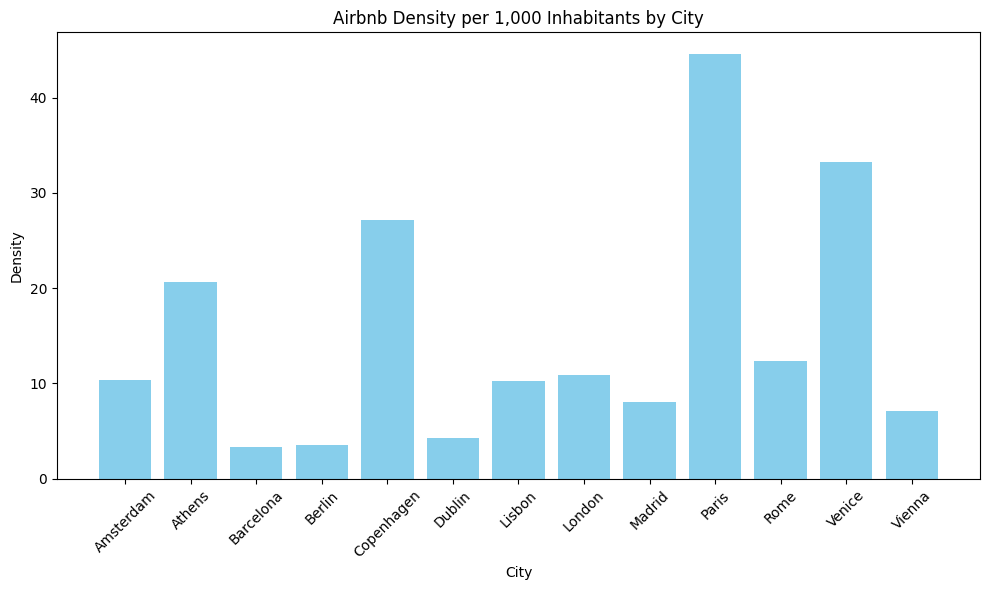

In [43]:
plt.figure(figsize=(10, 6))
plt.bar(df['City'], df['Density'], color='skyblue')
plt.title('Airbnb Density per 1,000 Inhabitants by City')
plt.xlabel('City')
plt.ylabel('Density')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Activity

*We are interested in the AirBnB bookings and income per listing for each city. Calculate, for each city, the average number of nights a listing is booked, by assuming that half of the bookings have reviews, and that each booking is for three nights. Use the number of reviews for the last 12 months for each listing. To calculate the income per listing, multiply the price of each listing by the number of bookings you have calculated for the listing. Then, find the average of the income per listing for each city.*

* The average bookings will be calculated as such: 

Bookings per City = mean ( Number of Reviews × 2 )

* The average booked nights will be calculated as such:

Booked Nights per City = mean ( Number of Reviews × 2 × 3 )

* The average income will be calculated as such:

Income per City = mean ( Price per Listing × Booked Nights ) = mean ( Price per Listing × ( Number of Reviews × 2 x 3 ) )

* Creating empty lists in which I will add the bookings and the income.

In [44]:
average_bookings = []
average_nights = []
average_income = []

* Looping through each folder in the 'data' directory.
* Checking if the path is a directory and the 'listings.csv' file exists in it.
* Reading the csv file and calculating bookings, booked nights and income.
* Calculating the means of the data and appending them to their lists.

In [45]:
for city in os.listdir(data_dir): 
    city_path = os.path.join(data_dir, city)
    if os.path.isdir(city_path):
        csv_path = os.path.join(city_path, 'listings.csv')
        if os.path.isfile(csv_path):
            listing = pd.read_csv(csv_path)
            
            booking = (listing['number_of_reviews_ltm'].fillna(0) * 2)
            avg_booking = booking.mean()
            average_bookings.append(avg_booking)
            
            nights = booking * 3
            avg_nights = nights.mean()
            average_nights.append(avg_nights)
            
            inc = listing['price'] * nights
            avg_income = inc.mean()
            average_income.append(avg_income)

* Adding average bookings, average booked nights and average income to the DataFrame.

In [46]:
df['Average Bookings'] = average_bookings
df['Average Booked Nights'] = average_nights
df['Average Income'] = average_income

* Showing all findings in tabular format.

In [47]:
df[["City", "Average Bookings", "Average Booked Nights", "Average Income"]]

,City,Average Bookings,Average Booked Nights,Average Income
0,Amsterdam,18.741692,56.225075,16506.873062
1,Athens,28.772940,86.318819,8796.018825
2,Barcelona,23.811621,71.434863,16964.680586
3,Berlin,17.866705,53.600116,11798.788799
4,Copenhagen,10.196183,30.588550,50349.852604
5,Dublin,28.448259,85.344777,15502.200345
6,Lisbon,29.236159,87.708478,13223.195780
7,London,11.515211,34.545632,7016.020093
8,Madrid,28.323944,84.971831,12642.420068
9,Paris,11.213647,33.640942,8281.249416


# Cross-Check

*Find the total number of bookings and nights spent over the last 12 months period for which you have data, for each of the cities. Then compare your findings with publicly available data. Explain how you sourced the data, the methodology that has been used for their collection, and your assessment of their quality. Discuss any differences from your own results.*

* The total bookings will be calculated as such: 

Bookings per City = sum ( Number of Reviews × 2 )

* The total booked nights will be calculated as such:

Booked Nights per City = sum ( Number of Reviews × 2 × 3 )

* Creating empty lists in which I will add the bookings and the nights.

In [48]:
total_bookings = []
total_nights = []

* Looping through each folder in the 'data' directory.
* Checking if the path is a directory and the 'listings.csv' file exists in it.
* Reading the csv file and calculating bookings per listing and booked nights per listing.
* Calculating the sum of the data and appending them to their lists.

In [49]:
for city in os.listdir(data_dir): 
    city_path = os.path.join(data_dir, city)
    if os.path.isdir(city_path):
        csv_path = os.path.join(city_path, 'listings.csv')
        if os.path.isfile(csv_path):
            listing = pd.read_csv(csv_path)
            
            booking = (listing['number_of_reviews_ltm'].fillna(0) * 2)
            tot_booking = booking.sum()
            total_bookings.append(tot_booking)
            
            nights = booking * 3
            tot_nights = nights.sum()
            total_nights.append(tot_nights)

* Adding bookings and nights to the DataFrame.

In [50]:
df['Total Bookings'] = total_bookings
df['Total Booked Nights'] = total_nights

* Showing all findings in tabular format.

In [51]:
df[["City", "Total Bookings", "Total Booked Nights"]]

,City,Total Bookings,Total Booked Nights
0,Amsterdam,181026,543078
1,Athens,381932,1145796
2,Barcelona,463898,1391694
3,Berlin,245828,737484
4,Copenhagen,213192,639576
5,Dublin,175668,527004
6,Lisbon,707632,2122896
7,London,1107556,3322668
8,Madrid,764180,2292540
9,Paris,1070466,3211398


### Research

* My data sources are [Airbtics](https://airbtics.com/airbnb-occupancy-rate/) and [Backlinko](https://backlinko.com/airbnb-stats#average-nights-per-airbnb-booking).
* Both are third-party companies that provide publicly available data.
* Because we needed exact numbers and not just percentages, I had to collect and combine data from the listed sources.
* The data collected, however, can be considered quite accurate, since both companies update their information often and are generally considered reliable sources. It must be noted, though, that Backlinko does not directly provide data, but reports from experts.

* In order to find as reliable data as I could, I created an account in [Airbtics](https://airbtics.com/airbnb-occupancy-rate/), which is an Airbnb data and analytics company that updates its data every week.
* In this website, occupancy is stated as "How often was a typical active property occupied over the last 12 months?".
* Consequently, I am able to calculate the total booked nights for the past 12 months as such:

Booked Nights = Active Listings × Average Occupancy Rate × 365

* Unfortunately, I was not able to find an exact number for bookings.
* However, according to [Backlinko](https://backlinko.com/airbnb-stats#average-nights-per-airbnb-booking), which has well-researched content and often includes data from case studies, surveys, and analyses of real-world scenarios, the average nights per booking in Europe are 3,9.
* Consequently, I am able to calculate the total bookings for the past 12 months as such:

Bookings = Booked Nights / 3.9

### Amsterdam

* The active listings are 4.346.
* The average occupancy rate is 85%.

### Athens

* The active listings are 11.617.
* The average occupancy rate is 72%.

### Barcelona

* The active listings are 11.566.
* The average occupancy rate is 86%.

### Berlin

* The active listings are 6.311.
* The average occupancy rate is 81%.

### Copenhagen

* The active listings are 8.672.
* The average occupancy rate is 84%.

### Dublin

* The active listings are 3.755.
* The average occupancy rate is 74%.

### Lisbon

* The active listings are 12.560.
* The average occupancy rate is 84%.

### London

* The active listings are 50.333.
* The average occupancy rate is 74%.

### Madrid

* The active listings are 18.143.
* The average occupancy rate is 83%.

### Paris

* The active listings are 19.928.
* The average occupancy rate is 77%.

### Rome

* The active listings are 24.924.
* The average occupancy rate is 81%.

### Venice

* The active listings are 7.146.
* The average occupancy rate is 74%.

### Vienna

* The active listings are 10.080.
* The average occupancy rate is 76%.

### Calculations and Comparison

* Adding all active listings and average occupancy rates in lists.

In [52]:
active_listings = [4346, 11617, 11566, 6311, 8672, 3755, 12560, 50333, 18143, 19928, 24924, 7146, 10080]
average_occupancy_rates = [0.85, 0.72, 0.86, 0.81, 0.84, 0.74, 0.84, 0.74, 0.83, 0.77, 0.81, 0.74, 0.76]

* Calculating the total nights and total bookings according to my research.

In [53]:
# Calculate total nights
researched_total_nights = []
for i in range(len(active_listings)):
    total_nights = active_listings[i] * average_occupancy_rates[i] * 365
    researched_total_nights.append(round(total_nights))

# Calculate total bookings
researched_total_bookings = []
for i in range(len(researched_total_nights)):
    total_bookings = researched_total_nights[i] / 3.9
    researched_total_bookings.append(round(total_bookings))

* Adding them to the DataFrame.

In [54]:
df['Researched Total Bookings'] = researched_total_bookings
df['Researched Total Booked Nights'] = researched_total_nights

* Showing all findings in tabular format.

In [55]:
df[["City", "Total Bookings", "Total Booked Nights", "Researched Total Bookings", "Researched Total Booked Nights"]]

,City,Total Bookings,Total Booked Nights,Researched Total Bookings,Researched Total Booked Nights
0,Amsterdam,181026,543078,345730,1348346
1,Athens,381932,1145796,782807,3052948
2,Barcelona,463898,1391694,930915,3630567
3,Berlin,245828,737484,478422,1865847
4,Copenhagen,213192,639576,681753,2658835
5,Dublin,175668,527004,260058,1014225
6,Lisbon,707632,2122896,987409,3850896
7,London,1107556,3322668,3485883,13594943
8,Madrid,764180,2292540,1409339,5496422
9,Paris,1070466,3211398,1436093,5600764


* It is obvious that in most cities, the researched data shows significantly higher numbers compared to those from insideAirBnB.
* A plethora of factors might be responsible for that:
    * Firstly, most of the insideAirBnB maps, as discussed above, cover a different area than the actual cities. Consequently, the data I've gathered includes a broader geographical space, which could lead to higher numbers.
    * Secondly, since I am not familiar with the collection procedure of the websites, they might use different methods to collect and report data.
    * Lastly, the calculations shown are based on processes that may not be optimal, and certain assumptions were made during these calculations.
* In conclusion, there are differences between the insideAirBnB data and my research. Unfortunately, due to limited access to the researched websites, I am unable to conduct a thorough data comparison to further investigate the source of these discrepancies.

# Visualisation

*Check the visualisations at the right of <https://insideairbnb.com/athens/>. Replicate these visualisations. Make the selection interactive, i.e., the user should be able to select a city from a dropdown box and see the corresponding visualisations. You can use any visualisation library.*

* Calculating all needed values and creating the requested visualisations.

In [56]:
# Get list of city folders
cities = [city for city in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, city))]

# Dropdown widget for city selection
city_dropdown = widgets.Dropdown(
    options=cities,
    description='Select City:',
    style={'description_width': 'initial'}
)

# Function to load data and generate the charts based on the selected city
def update_chart(change):
    clear_output(wait=True)
    display(city_dropdown)
    
    selected_city = change['new']
    file_path = os.path.join(data_dir, selected_city, 'listings.csv')
    
    # Load listings data
    listing = pd.read_csv(file_path)
    
    # Calculate average metrics used in annotations
    listing['nights_booked'] = listing['number_of_reviews_ltm'].fillna(0) * 2 * 3
    listing['income'] = listing['price'].fillna(0) * listing['nights_booked']
    average_nights_booked = listing['nights_booked'].mean()
    average_price_per_night = listing['price'].mean()
    average_income = listing['income'].mean()
    
    # Calculate additional values for short-term and long-term rental percentages used in annotations
    short_term_threshold = 30
    short_term_rentals = listing[listing['minimum_nights'] < short_term_threshold].shape[0]
    long_term_rentals = listing[listing['minimum_nights'] >= short_term_threshold].shape[0]
    total_listings = len(listing)
    
    short_term_percentage = (short_term_rentals / total_listings) * 100
    long_term_percentage = (long_term_rentals / total_listings) * 100

    # Calculate single and multi-listings information used in annotations
    listings_per_host = listing['calculated_host_listings_count']
    listings_per_host = listings_per_host.apply(lambda x: 10 if x > 10 else x)
    single_listings = listings_per_host.value_counts().get(1, 0)
    single_listing_percentage = (single_listings / total_listings) * 100
    multi_listings = total_listings - single_listings
    multi_listing_percentage = 100 - single_listing_percentage

    # Create the subplot grid (3 rows, 2 columns)
    fig = make_subplots(
        rows=3, cols=2,
        subplot_titles=("Room Type", "Activity", 
                        "Licenses", "Short-Term Rentals",
                        "Listings per Host", "Top Hosts"),
        specs=[
            [{"type": "xy"}, {"type": "xy"}],
            [{"type": "domain"}, {"type": "xy"}],
            [{"type": "xy"}, {"type": "table"}]
        ],
        vertical_spacing=0.1,
        horizontal_spacing=0.1
    )

    # Visualization 1: Room Type Distribution (Bar chart)
    room_type_counts = listing['room_type'].value_counts()
    total_listings = room_type_counts.sum()
    room_type_percentages = (room_type_counts / total_listings) * 100

    desired_order = ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']
    room_type_counts = room_type_counts.reindex(desired_order).fillna(0)
    room_type_percentages = room_type_percentages.reindex(desired_order).fillna(0)

    room_types = list(reversed(room_type_counts.index.tolist()))
    counts = list(reversed(room_type_counts.values))
    percentages = list(reversed(room_type_percentages.values))

    fig.add_trace(go.Bar(
        y=room_types,
        x=counts,
        orientation='h',
        marker=dict(color=['#808080', '#aec6cf', '#77dd77', '#ff6961']),
        text=[f'{pct:.1f}%' for pct in percentages],
        hoverinfo='text',
        hovertext=[f"{count} listings ({pct:.1f}%)" for count, pct in zip(counts, percentages)]
    ), row=1, col=1)

    # Visualization 2: Activity Distribution (Bar chart)
    listing['nights_booked'] = listing['number_of_reviews_ltm'].fillna(0) * 2 * 3
    listing['income'] = listing['price'].fillna(0) * listing['nights_booked']
    
    bins = [0, 1, 30, 60, 90, 120, 150, 180, 210, 240, 255] + [np.inf]
    labels = ["0", "1-30", "31-60", "61-90", "91-120", "121-150", "151-180", "181-210", "211-240", "241-255", "255+"]
    listing['occupancy_bin'] = pd.cut(listing['nights_booked'], bins=bins, labels=labels, right=False)
    
    occupancy_counts = listing['occupancy_bin'].value_counts(sort=False)
    
    fig.add_trace(go.Bar(
        x=occupancy_counts.index,
        y=occupancy_counts.values,
        marker_color='skyblue',
        hovertemplate='<b>Occupancy Range</b>: %{x}<br>' +
                      '<b>Listings</b>: %{y}<extra></extra>'
    ), row=1, col=2)

    # Visualization 3: License Distribution (Pie chart)
    license_counts = {'licensed': 0, 'unlicensed': 0, 'exempt': 0, 'pending': 0}
    license_counts['unlicensed'] += listing['license'].isna().sum()

    licensed_listings = listing['license'].dropna().astype(str)
    exempt_count = licensed_listings.str.contains("exempt", case=False, na=False).sum()
    pending_count = licensed_listings.str.contains("pending", case=False, na=False).sum()

    license_counts['exempt'] += exempt_count
    license_counts['pending'] += pending_count

    licensed_count = len(licensed_listings) - exempt_count - pending_count
    license_counts['licensed'] += licensed_count

    total_listings = sum(license_counts.values())
    license_percentages = {k: (v / total_listings) * 100 for k, v in license_counts.items()}

    fig.add_trace(go.Pie(
        labels=[f"{k} ({v:.1f}%)" for k, v in license_percentages.items()],
        values=list(license_counts.values()),
        hole=0.5,
        textinfo='label+percent',
        hoverinfo='label+value+percent',
        marker=dict(colors=['#1f77b4', '#aec6cf', '#ffa500', '#ff9248']),
        textposition='inside'
    ), row=2, col=1)

    # Visualization 4: Short-Term Rentals Distribution (Bar chart)
    bins = list(range(1, 36)) + [np.inf]
    labels = list(range(1, 35)) + ['35+']
    listing['minimum_nights_binned'] = pd.cut(
        listing['minimum_nights'],
        bins=bins,
        labels=labels,
        right=False
    )

    listings_count_binned = listing['minimum_nights_binned'].value_counts().sort_index()

    short_term_threshold = 30
    short_term_rentals = listing[listing['minimum_nights'] < short_term_threshold].shape[0]
    long_term_rentals = listing[listing['minimum_nights'] >= short_term_threshold].shape[0]
    
    fig.add_trace(go.Bar(
        x=listings_count_binned.index.astype(str),
        y=listings_count_binned.values,
        marker_color='skyblue',
        hovertemplate='Minimum Nights: %{x}<br>Listings: %{y}<extra></extra>'
    ), row=2, col=2)

    # Visualization 5: Listings per Host (Bar chart)
    listings_per_host = listing['calculated_host_listings_count']
    listings_per_host = listings_per_host.apply(lambda x: 10 if x > 10 else x)
    listings_per_host = listings_per_host.value_counts().sort_index()

    listings_per_host.rename(index={10: '10+'}, inplace=True)

    fig.add_trace(go.Bar(
        x=listings_per_host.index.astype(str),
        y=listings_per_host.values,
        marker_color='skyblue',
        hovertemplate='Listings per host: %{x}<br>Total listings: %{y}<extra></extra>'
    ), row=3, col=1)

    # Visualization 6: Top Hosts (Table)
    filtered_listing = listing[['host_id','host_name', 'room_type']]
    room_type_counts = (
        filtered_listing
        .groupby(['host_id','host_name', 'room_type'])
        .size()
        .unstack(fill_value=0)
        .reindex(columns=['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'], fill_value=0)
    )

    room_type_counts = room_type_counts.rename(columns={
        'Entire home/apt': '#Entire homes/apts',
        'Private room': '#Private rooms',
        'Shared room': '#Shared rooms',
        'Hotel room': '#Hotel Rooms'
    })
    room_type_counts['#Listings'] = room_type_counts.sum(axis=1)
    top_hosts = room_type_counts.sort_values(by='#Listings', ascending=False).head(50)
    top_hosts.reset_index(inplace=True)
    top_hosts = top_hosts.rename(columns={'host_name': 'Host Name'})

    fig.add_trace(go.Table(
        header=dict(values=["Host Name", "#Entire homes/apts", "#Private rooms", "#Shared rooms", "#Hotel Rooms", "#Listings"]),
        cells=dict(values=[top_hosts['Host Name'], top_hosts['#Entire homes/apts'], top_hosts['#Private rooms'], 
                           top_hosts['#Shared rooms'], top_hosts['#Hotel Rooms'], top_hosts['#Listings']])
    ), row=3, col=2)

    # Update layout and show the figure
    fig.update_layout(
        height=1000,
        width=1100,
        title_text=f"Multiple Visualizations for {selected_city}",
        showlegend=False
    )
    
    # Annotations for subplot 2
    fig.add_annotation(
        x=1, y=0.95,
        text=f"{average_nights_booked:.1f} average nights booked",
        showarrow=False,
        xref="x domain", yref="y domain",
        font=dict(color="black"),
        xanchor="right",
        row=1, col=2
    )

    fig.add_annotation(
        x=1, y=0.85,
        text=f"{average_price_per_night:.1f} price/night",
        showarrow=False,
        xref="x domain", yref="y domain",
        font=dict(color="black"),
        xanchor="right",
        row=1, col=2
    )

    fig.add_annotation(
        x=1, y=0.75,
        text=f"{average_income:.1f} average income",
        showarrow=False,
        xref="x domain", yref="y domain",
        font=dict(color="black"),
        xanchor="right",
        row=1, col=2
    )

    # Annotations for subplot 4
    fig.add_shape(
        type="line",
        x0=str(short_term_threshold),
        y0=0,
        x1=str(short_term_threshold),
        y1=max(listings_count_binned.values),
        line=dict(color="grey", dash="dash"),
        row=2, col=2
    )

    fig.add_annotation(
        x=str(short_term_threshold),
        y=max(listings_count_binned.values) * 0.6,
        text="STR Threshold",
        showarrow=False,
        font=dict(color="grey"),
        xshift=-10,
        textangle=90,
        row=2, col=2
    )

    fig.add_annotation(
        x=1, y=0.85,
        text=f"{short_term_percentage:.1f}% short-term rentals ({short_term_rentals})",
        showarrow=False,
        xref="x domain", yref="y domain",
        font=dict(color="black"),
        xanchor="right",
        row=2, col=2
    )

    fig.add_annotation(
        x=1, y=0.95,
        text=f"{long_term_percentage:.1f}% longer-term rentals ({long_term_rentals})",
        showarrow=False,
        xref="x domain", yref="y domain",
        font=dict(color="black"),
        xanchor="right",
        row=2, col=2
    )

    # Annotations for subplot 5
    fig.add_annotation(
        x=1, y=0.95,
        text=f"{single_listings} ({single_listing_percentage:.1f}%) single listings",
        showarrow=False,
        xref="x domain", yref="y domain",
        font=dict(size=12, color="black", family="Arial"),
        xanchor="right",
        row=3, col=1
    )

    fig.add_annotation(
        x=1, y=0.85,
        text=f"{multi_listings} ({multi_listing_percentage:.1f}%) multi-listings",
        showarrow=False,
        xref="x domain", yref="y domain",
        font=dict(size=12, color="black", family="Arial"),
        xanchor="right",
        row=3, col=1
    )

    fig.show()

# Attach the update function to the dropdown widget and display it
city_dropdown.observe(update_chart, names='value')
display(city_dropdown)

# Manually trigger the update for the default city (Amsterdam)
update_chart({'new': cities[0]})


Dropdown(description='Select City:', options=('Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Copenhagen', 'Dub…

# Resources

1. **Airbtics Occupancy Rate** <br>
   https://airbtics.com/airbnb-occupancy-rate/

2. **Amsterdam's Municipal Research and Statistics (O&S)** <br>
   https://onderzoek.amsterdam.nl/interactief/dashboard-kerncijfers?tab=indicator&thema=bevolking&indicator=BEVTOTAAL&indeling=ggwgebieden&jaar=2024&gebied=GA01&taal=nl

3. **Backlinko Airbnb Stats** <br>
   https://backlinko.com/airbnb-stats#average-nights-per-airbnb-booking

4. **Central Statistics Office (CSO) Ireland** <br>
   https://visual.cso.ie/?body=entity/ima/cop/2022&boundary=C03880V04631&guid=F97E459B-57ED-49C0-8A28-2BC1C7F08E88

5. **CityPopulation.de** <br>
   https://www.citypopulation.de/en/italy/romacity/

6. **Hellenic Statistical Authority (ELSTAT)** <br>
   https://www.statistics.gr/el/statistics/-/publication/SAM03/-

7. **Inside Airbnb** <br>
   https://insideairbnb.com/

8. **Instituto Nacional de Estadística (INE)** <br>
   https://www.ine.es/nomen2/index.do?accion=busquedaAvanzada&entidad_amb=no&codProv=28&codMuni=79&codEC=0&codES=0&codNUC=0&denominacion_op=like&denominacion_txt=&L=1

9. **Instituto Nacional de Estadística (INE)** <br>
   https://www.ine.es/jaxiT3/Tabla.htm?t=59589&L=1

10. **IstatData** <br>
   https://esploradati.istat.it/databrowser/#/en/dw/categories/IT1,POP,1.0/POP_POPULATION/DCIS_POPRES1/DCIS_POPRES1_REG_MUN/IT1,22_289_DF_DCIS_POPRES1_9,1.0

11. **Office for National Statistics (ONS)** <br>
   https://www.nomisweb.co.uk/sources/census_2021/report?compare=E12000007

12. **PORDATA** <br>
   https://www.pordata.pt/pt/estatisticas/populacao/populacao-residente/populacao-residente-por-sexo-e-grupo-etario

13. **Statistics Denmark's** <br>
   https://www.statbank.dk/statbank5a/SelectVarVal/Define.asp?MainTable=FOLK1AM&PLanguage=1&PXSId=0&wsid=cftree

14. **Statistik Austria** <br>
   https://www.statistik.at/en/statistics/population-and-society/population/population-stock/population-at-beginning-of-year/quarter

15. **Statistisches Landesamt Berlin (Berlin-Brandenburg State Statistical Office)** <br>
   https://www.statistik-berlin-brandenburg.de/kommunalstatistik/einwohnerbestand-berlin

16. **World Population Review** <br> 
   https://worldpopulationreview.com/cities/france